In [41]:
%reload_ext autoreload
%autoreload 2
from experiments import experiment
from tqdm import tqdm
import numpy as np
from numpy.random import multinomial

In [42]:
distribution = [
    ## полная независимость
    [
        ([0, 0, 0], 0.125),
        ([0, 0, 1], 0.125),
        ([0, 1, 0], 0.125),
        ([0, 1, 1], 0.125),
        ([1, 0, 0], 0.125),
        ([1, 0, 1], 0.125),
        ([1, 1, 0], 0.125),
        ([1, 1, 1], 0.125)
    ],
    ## условная независимость
    [
        ([0, 0, 0], 0.15),
        ([0, 0, 1], 0.1),
        ([0, 1, 0], 0.3),
        ([0, 1, 1], 0.1),
        ([1, 0, 0], 0.05),  
        ([1, 0, 1], 0.1),
        ([1, 1, 0], 0.1),
        ([1, 1, 1], 0.1)
    ],
    ## полу-условная независимость
    [
        ([0, 0, 0], 0.15),
        ([0, 0, 1], 0.06),
        ([0, 1, 0], 0.3),
        ([0, 1, 1], 0.16),
        ([1, 0, 0], 0.05),  
        ([1, 0, 1], 0.08),
        ([1, 1, 0], 0.1),
        ([1, 1, 1], 0.1)
    ],
    ## пирсон 0, но гипотеза не верна
    [
        ([0, 0, 0], 0.15),
        ([0, 0, 1], 0.1),
        ([0, 1, 0], 0.1),
        ([0, 1, 1], 0.15),
        ([1, 0, 0], 0.1),  
        ([1, 0, 1], 0.15),
        ([1, 1, 0], 0.15),
        ([1, 1, 1], 0.1)
    ],
    ## гипотеза не верна, но верна Y,Z | X
    [
        ([0, 0, 0], 0.15),
        ([0, 0, 1], 0.05),
        ([0, 1, 0], 0.3),
        ([0, 1, 1], 0.1),
        ([1, 0, 0], 0.1),
        ([1, 0, 1], 0.1),
        ([1, 1, 0], 0.1),
        ([1, 1, 1], 0.1)
    ],
    ## произвольные вероятности
    [
        ([0, 0, 0], 0.03),
        ([0, 0, 1], 0.10),
        ([0, 1, 0], 0.04),
        ([0, 1, 1], 0.08),
        ([1, 0, 0], 0.30),
        ([1, 0, 1], 0.1),
        ([1, 1, 0], 0.07),
        ([1, 1, 1], 0.28)
    ],
    ## произвольные вероятности
    [
        ([0, 0, 0], 0.21),
        ([0, 0, 1], 0.12),
        ([0, 1, 0], 0.04),
        ([0, 1, 1], 0.34),
        ([1, 0, 0], 0.1),
        ([1, 0, 1], 0.12),
        ([1, 1, 0], 0.02),
        ([1, 1, 1], 0.05)
    ],
]

In [3]:
def get_score(dist):
  power_ump = []
  power_ump2 = []
  power_partial = []

  grid = [i for i in range(50,300+1, 10)]
  for n in tqdm(grid):
    while True:
      try:
        cur_ump, cur_ump2, cur_partial = experiment(dist, n, 100000, 0.05)
        power_ump.append(cur_ump)
        power_ump2.append(cur_ump2)
        power_partial.append(cur_partial)
        break
      except Exception:
        print('GG')
  return (power_ump, power_ump2, power_partial)

In [4]:
results = []
for dist in distribution:
    results.append(get_score(dist))

  0%|          | 0/26 [00:00<?, ?it/s]

100%|██████████| 26/26 [2:18:19<00:00, 319.22s/it]


In [5]:
# import pickle

# with open('data.pickle', 'wb') as f:
#     pickle.dump(results, f, pickle.HIGHEST_PROTOCOL)

In [43]:
import pickle

with open('data.pickle', 'rb') as f:
    results = pickle.load(f)

In [44]:
# def get_odd(x):
#     new_x=[]
#     for i in range(len(x)):
#         if i%2==0:
#             new_x.append(x[i])
#     return new_x
# power_ump = get_odd(power_ump)
# power_ump2 = get_odd(power_ump2)
# power_partial = get_odd(power_partial)
# grid = get_odd(grid)

In [71]:
import numpy as np

def calc_binary(p00,p01,p10,p11):
    num = p00*p11-p01*p10
    den = (p01+p11)*(p10+p11)*(p00+p01)*(p00+p10)
    return num / np.sqrt(den)

def calc_partial(p000,p001,p010,p011,p100,p101,p110,p111):
    pXY = calc_binary(p000+p001,p010+p011,p100+p101,p110+p111)
    pXZ = calc_binary(p000+p010, p001+p011, p100+p110, p101+p111)
    pYZ = calc_binary(p000+p100, p001+p101, p010+p110, p011+p111)
    num = pXY - pXZ * pYZ
    den = np.sqrt(1-np.power(pXZ,2)) * np.sqrt(1-np.power(pYZ,2))
    return num / den 

def calc_num(p000,p001,p010,p011,p100,p101,p110,p111):
    theta = np.log((p001*p111*p010*p100)/(p011*p101*p000*p110))
    theta0 = np.log((p000*p110)/(p010*p100))
    theta1 = np.log((p001*p111)/(p011*p101))
    return np.round(theta,3), np.round(theta0,3), np.round(theta1,3), np.round(calc_partial(p000,p001,p010,p011,p100,p101,p110,p111),3)


In [75]:
power_ump, power_ump2, power_partial = results[1]
probb = [i[1] for i in distribution[1]]

In [76]:
grid = [i for i in range(50,300+1, 10)]

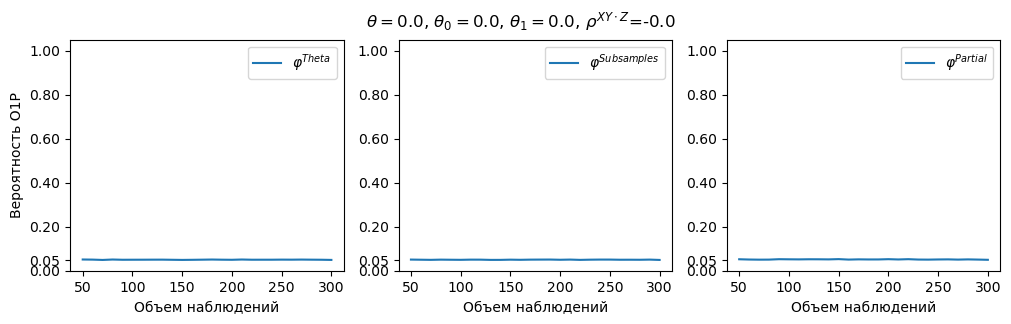

In [77]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,3))
cur = calc_num(probb[0],probb[1],probb[2],probb[3],probb[4],probb[5],probb[6],probb[7])
plt.suptitle(f'$\\theta=${cur[0]}, $\\theta_0=${cur[1]}, $\\theta_1=${cur[2]}, $\\rho^{{XY \cdot Z}}$={cur[3]}')

plt.subplot(1,3,1)
plt.ylim(0, 1.05)
plt.yticks([0,0.05, 0.2, 0.4, 0.6, 0.8, 1.0])
plt.plot(grid, power_ump, label='$\\varphi^{Theta}$')
plt.xlabel('Объем наблюдений')
plt.ylabel('Вероятность О1Р')
plt.legend()

plt.subplot(1,3,2)
plt.ylim(0, 1.05)
plt.yticks([0,0.05, 0.2, 0.4, 0.6, 0.8, 1.0])
plt.plot(grid, power_ump2, label='$\\varphi^{Subsamples}$')
plt.xlabel('Объем наблюдений')
plt.legend()

plt.subplot(1,3,3)
plt.ylim(0, 1.05)
plt.yticks([0,0.05, 0.2, 0.4, 0.6, 0.8, 1.0])
plt.plot(grid, power_partial, label='$\\varphi^{Partial}$')
plt.xlabel('Объем наблюдений')
plt.legend()


# plt.yticks([0.05, 0.2, 0.4, 0.6, 0.8])

plt.savefig('graph2.png', dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.show()

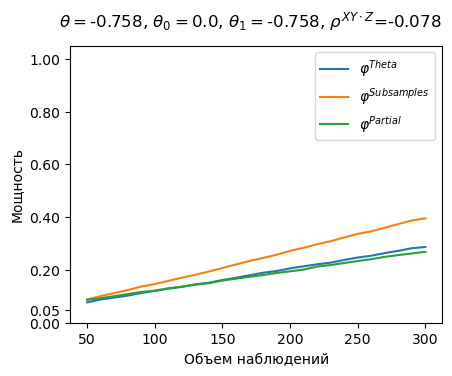

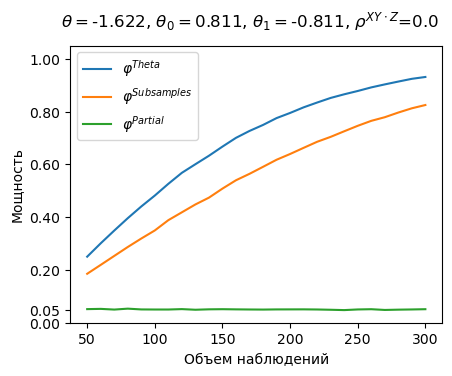

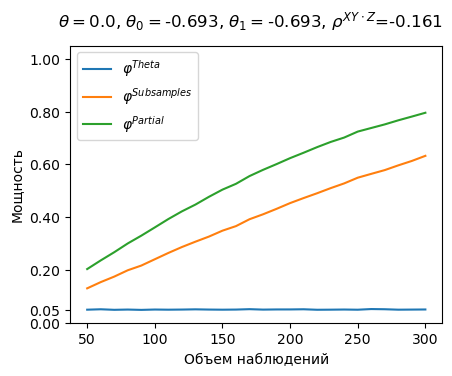

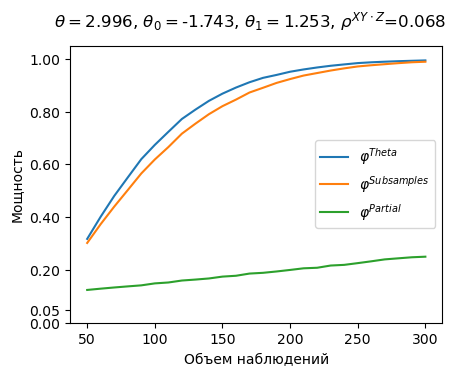

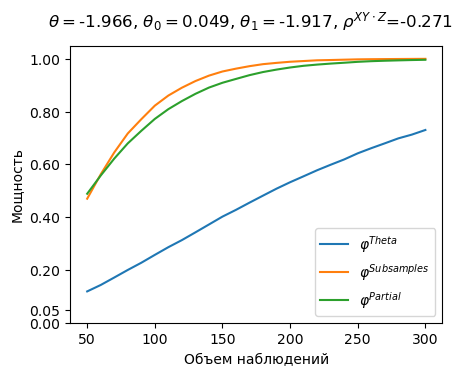

In [78]:
for i in range(2,7):
    power_ump, power_ump2, power_partial = results[i]
    probb = [j[1] for j in distribution[i]]
    cur = calc_num(probb[0],probb[1],probb[2],probb[3],probb[4],probb[5],probb[6],probb[7])
    plt.figure(figsize=(4*1.2,3*1.2))
    plt.suptitle(f'$\\theta=${cur[0]}, $\\theta_0=${cur[1]}, $\\theta_1=${cur[2]}, $\\rho^{{XY \cdot Z}}$={cur[3]}')
    plt.plot(grid, power_ump, label='$\\varphi^{Theta}$')
    plt.plot(grid, power_ump2, label='$\\varphi^{Subsamples}$')
    plt.plot(grid, power_partial, label='$\\varphi^{Partial}$')

    plt.ylim(0, 1.05)
    plt.yticks([0,0.05, 0.2, 0.4, 0.6, 0.8, 1.0])
    plt.xlabel('Объем наблюдений')
    plt.ylabel('Мощность')
    plt.legend()
    plt.savefig(f'graph{i+1}.png', dpi=300, bbox_inches='tight', pad_inches=0.1)
    plt.show()

In [27]:
calc_num(p000 = 0.15, p001 = 0.06, p010 = 0.3, p011 = 0.16, p100 = 0.05, p101 = 0.08, p110 =
0.1, p111 = 0.1)

(-0.758, 0.0, -0.758, -0.08)

In [28]:
calc_num(p000 = 0.21, p001 = 0.12, p010 = 0.04, p011 = 0.34, p100 = 0.1, p101 = 0.12, p110 =
0.02, p111 = 0.05)

(-1.966, 0.049, -1.917, -0.243)

In [29]:
calc_num(p000 = 0.03, p001 = 0.1, p010 = 0.04, p011 = 0.08, p100 = 0.3, p101 = 0.1, p110 =
0.07, p111 = 0.28)

(2.996, -1.743, 1.253, 0.063)

In [90]:
from numpy import cov

def partial_pearson_calc(x):
    n = x.shape[0]
    s = cov(x.T, ddof=1)
    s_inv = np.linalg.inv(s)
    par = -s_inv[0][1]/np.sqrt(s_inv[0][0] * s_inv[1][1])
    return par

In [91]:
from numpy.random import choice
from tqdm import tqdm

def par_experiment(distribution,n,k):
    x = [i for i in range(8)]
    proba = [i[1] for i in distribution]
    s_ump = 0
    s_ump2 = 0
    s_partial = 0
    arr = []
    for _ in tqdm(range(k)):
        X = choice(x, p=proba, size=n)
        X = np.array([distribution[i][0] for i in X])
        arr.append(partial_pearson_calc(X))
    return np.mean(arr)

In [96]:
distribution[4]

[([0, 0, 0], 0.15),
 ([0, 0, 1], 0.05),
 ([0, 1, 0], 0.3),
 ([0, 1, 1], 0.1),
 ([1, 0, 0], 0.1),
 ([1, 0, 1], 0.1),
 ([1, 1, 0], 0.1),
 ([1, 1, 1], 0.1)]

In [100]:
par_experiment(distribution[6], 100, 1000000)

100%|██████████| 1000000/1000000 [04:56<00:00, 3370.06it/s]


-0.27166397065036413